資料集來源：https://www.kaggle.com/datasets/jackdaoud/marketing-data?resource=download

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# 匯入資料

df = pd.read_csv('marketing_data.csv')
df.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
5,62513.0,0,1,16,520,42,98,0,42,14,...,1,0,0,0,0,1,0,702,688,0
6,55635.0,0,1,34,235,65,164,50,49,27,...,0,0,0,0,1,0,0,563,536,0
7,33454.0,1,0,32,76,10,56,3,1,23,...,0,0,0,0,0,0,1,146,123,0
8,30351.0,1,0,19,14,0,24,3,3,2,...,1,0,0,0,0,0,1,44,42,0
9,5648.0,1,1,68,28,0,6,1,1,13,...,1,0,0,0,0,0,1,36,23,1


In [3]:
# 檢視資料集資訊

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

## 資料預處理

In [4]:
df_marital = df[[x for x in df.columns if x.startswith('marital')]]
for i in df_marital.columns:
    x = i.split('_')[1]
    df.loc[df[i]==1, 'Marital'] = x
    
df_edu = df[[x for x in df.columns if x.startswith('education')]]
for i in df_edu.columns:
    x = i.split('_')[1]
    df.loc[df[i]==1, 'Education'] = x

df['AcceptedCmpOrNot'] = df['AcceptedCmpOverall'].apply(lambda i: 1 if i!=0 else 0)
df['NumPurchase'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
print('Marital:', df['Marital'].unique())
print('Education:', df['Education'].unique())
color = sns.color_palette("deep")

Marital: ['Single' 'Together' 'Married' 'Divorced' 'Widow']
Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


## 探索式資料分析（EDA, Exploratory Data Analysis）

In [5]:
# 敘述統計

df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,AcceptedCmpOrNot,NumPurchase
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.00000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932,0.20771,12.569615
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044,0.40576,7.180350
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000,0.00000,0.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000,0.00000,6.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000,0.00000,12.000000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000,0.00000,18.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000,1.00000,32.000000


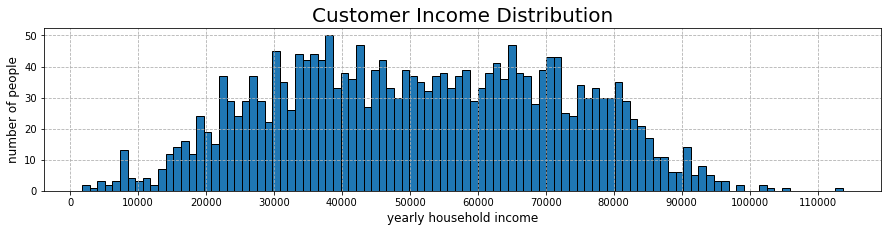

In [6]:
# 消費者年收入分布

plt.figure(figsize=(15, 3))
plt.hist(df['Income'], bins=100, edgecolor='black')
plt.xlabel('yearly household income', size=12)
plt.ylabel('number of people', size=12)
plt.title('Customer Income Distribution', size=20)
plt.grid(ls='--')
x_ticks = range(0, int(max(df['Income'])) + 1, 10000)
plt.xticks(x_ticks)
plt.show()

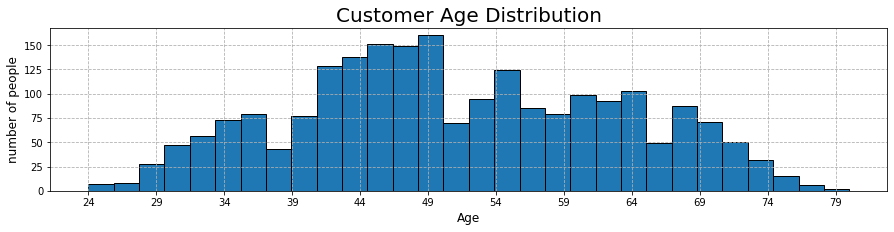

In [7]:
# 消費者年齡分布

plt.figure(figsize=(15, 3))
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.xlabel('Age', size=12)
plt.ylabel('number of people', size=12)
plt.title('Customer Age Distribution', size=20)
plt.grid(ls='--')
x_ticks = range(int(min(df['Age'])), int(max(df['Age'])) + 1, 5)
plt.xticks(x_ticks)
plt.show()

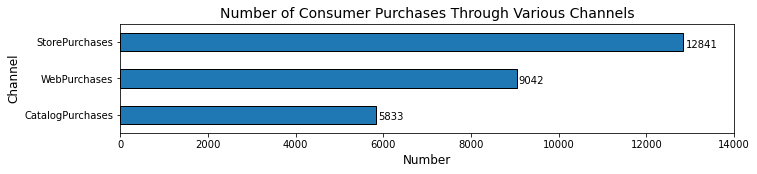

In [8]:
# 購買通路次數

df_channel = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values()
df_channel.index = [i.split('Num')[1] for i in df_channel.index]
plt.figure(figsize=(11, 2))
df_channel.plot.barh(edgecolor='black')
plt.ylabel('Channel', size=12)
plt.xlabel('Number', size=12)
plt.xticks(range(0, 16000, 2000))
plt.title('Number of Consumer Purchases Through Various Channels', size=14)
for i, value in enumerate(df_channel):
        plt.text(value+50, i-0.15, str(round(value, 2)), color='black')
plt.show()

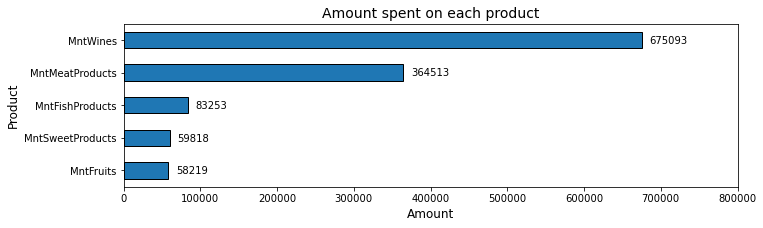

In [9]:
# 過去兩年各產品銷售總額

df_Mnt_sum = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum().sort_values()
plt.figure(figsize=(11, 3))
df_Mnt_sum.plot.barh(edgecolor='black')
plt.title('Amount spent on each product', size=14)
plt.ylabel('Product', size=12)
plt.xlabel('Amount', size=12)
plt.xticks(range(0, 900000, 100000))
for i, value in enumerate(df_Mnt_sum.values):
    plt.text(value+10000, i-0.1, str(value), color='black')
plt.show()

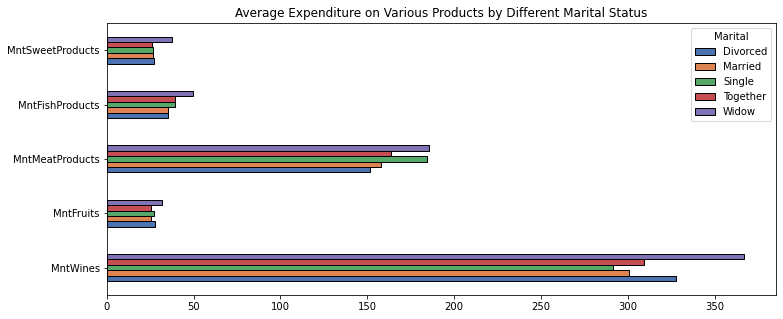

In [10]:
# 不同婚姻狀態的消費者在各類產品的平均消費金額
'''
1. Widow族群在各項產品的人均消費都是最高的，
2. Single族群在MeatProducts的消費金額較為突出，但在Wine的消費金額較低，
3. Divorced族群在Wines的消費金額較為突出，在MeatProducts的消費金額較低，
'''

df_Mnt_meand = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'Marital']].\
                groupby('Marital').agg('mean').T
fig, ax = plt.subplots(figsize=(12, 5))
df_Mnt_meand.plot.barh(color=color, ax=ax, edgecolor='black')
plt.title('Average Expenditure on Various Products by Different Marital Status')
plt.show()

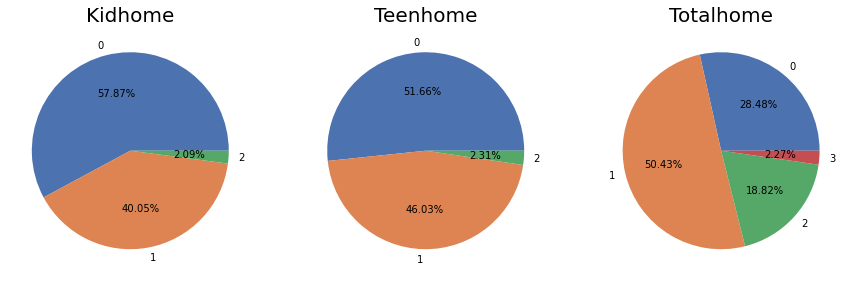

In [11]:
# 消費者的子女數

plt.figure(figsize=(15, 5))
df_kid = df.groupby(['Kidhome'])['Kidhome'].count()
plt.subplot(1, 3, 1)
plt.pie(x=df_kid,
        colors=color,
        labels=df_kid.index,
        autopct='%.2f%%',)
plt.title('Kidhome', size=20)

df_teen = df.groupby(['Teenhome'])['Teenhome'].count()
plt.subplot(1, 3, 2)
plt.pie(x=df_teen,
        colors=color,
        labels=df_teen.index,
        autopct='%.2f%%')
plt.title('Teenhome', size=20)

df['Totalhome'] = df['Kidhome'] + df['Teenhome']
df_child = df.groupby(['Totalhome'])['Totalhome'].count()
plt.subplot(1, 3, 3)
plt.pie(x=df_child,
        colors=color,
        labels=df_child.index,
        autopct='%.2f%%')
plt.title('Totalhome', size=20)

# plt.suptitle("Number of kids and teenagers in the consumer’s household", size=20)
plt.show()

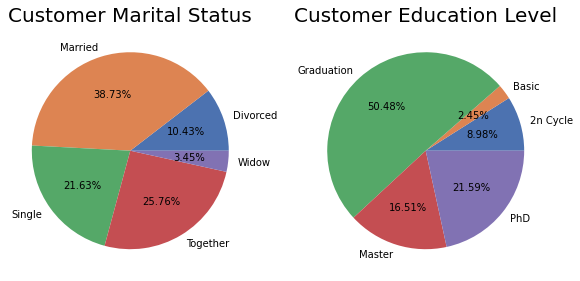

In [12]:
# 消費者婚姻狀況、教育程度分布

df_marital = df.groupby('Marital')['Marital'].count()
df_edu = df.groupby('Education')['Education'].count()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.pie(x=df_marital,
        colors=color,
        labels=df_marital.index,
        autopct='%.2f%%')
plt.title('Customer Marital Status', size=20)
plt.subplot(1, 3, 2)
plt.pie(x=df_edu,
        colors=color,
        labels=df_edu.index,
        autopct='%.2f%%')
plt.title('Customer Education Level', size=20)
plt.show()

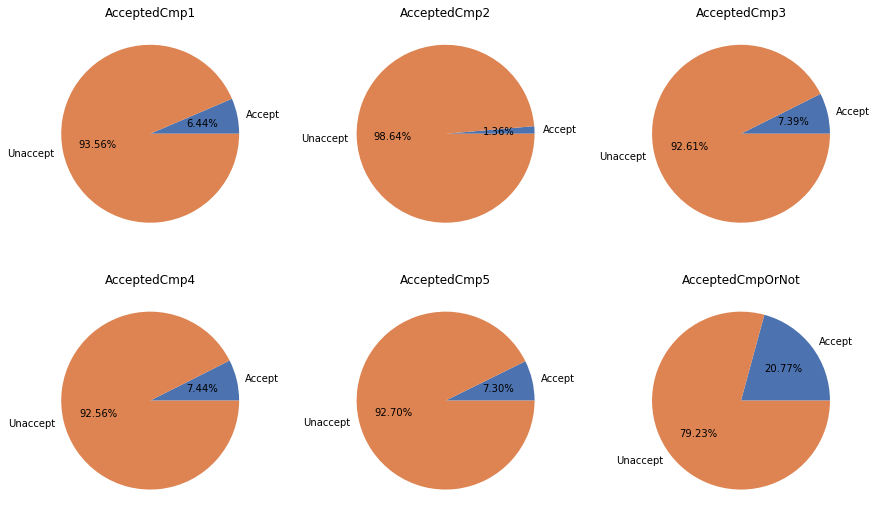

In [13]:
# 行銷活動接受狀況

df_camp = df[[x for x in df.columns if x.startswith('AcceptedCmp')]]
df_camp = df_camp.drop(['AcceptedCmpOverall'], axis=1)
temp = []
for i in df_camp.columns.sort_values():
    temp.append([i, df[i].sum(), len(df_camp)-df[i].sum()])
df_cmp_accept = pd.DataFrame(temp, columns=['Campaign', 'Accepted (person)', 'Unaccepted (person)']).sort_values(by='Campaign')
df_cmp_accept = df_cmp_accept[df_cmp_accept['Campaign']!='AcceptedCmpOrNot']
plt.figure(figsize=(15, 9))
for index, i in enumerate(temp):
    plt.subplot(2, 3, index+1)
    plt.pie(x=i[1:3],
        colors=color,
        labels=['Accept', 'Unaccept'],
        autopct='%.2f%%')
    plt.title(i[0])
plt.show()
df_cmp_accept = df_cmp_accept.drop(['Unaccepted (person)'], axis=1)

收入與消費總額的相關係數: 0.823


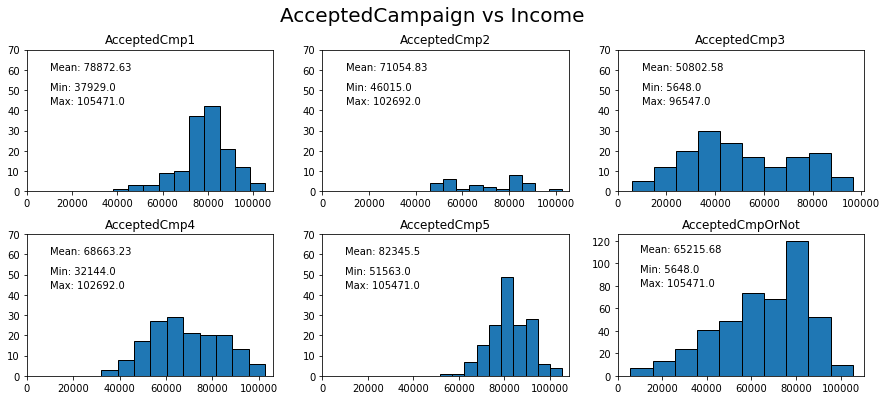

In [14]:
# 接受各活動的顧客收入分布

print('收入與消費總額的相關係數:', df['Income'].corr(df['MntTotal']).round(3))
plt.figure(figsize=(15, 6))
for index, i in enumerate(df_camp.columns.sort_values()):
    df_temp = df[df[i]==1]
    plt.subplot(2, 3, index+1)
    plt.hist(df_temp['Income'], edgecolor='black')
    plt.title(i)
    x_ticks = range(0, int(max(df['Income'])) + 1, 20000)
    plt.xticks(x_ticks)
    if i != 'AcceptedCmpOrNot':
        y_ticks = range(0, 80, 10)
        plt.yticks(y_ticks)
        plt.annotate(f"Mean: {round(df_temp['Income'].mean(), 2)}", xy=(10000, 60))
        plt.annotate(f"Min: {df_temp['Income'].min()}", xy=(10000, 50))
        plt.annotate(f"Max: {df_temp['Income'].max()}", xy=(10000, 43))
    else:
        plt.annotate(f"Mean: {round(df_temp['Income'].mean(), 2)}", xy=(10000, 110))
        plt.annotate(f"Min: {df_temp['Income'].min()}", xy=(10000, 92))
        plt.annotate(f"Max: {df_temp['Income'].max()}", xy=(10000, 80)) 
plt.subplots_adjust(hspace=0.3)
plt.suptitle('AcceptedCampaign vs Income', size=20)
plt.show()

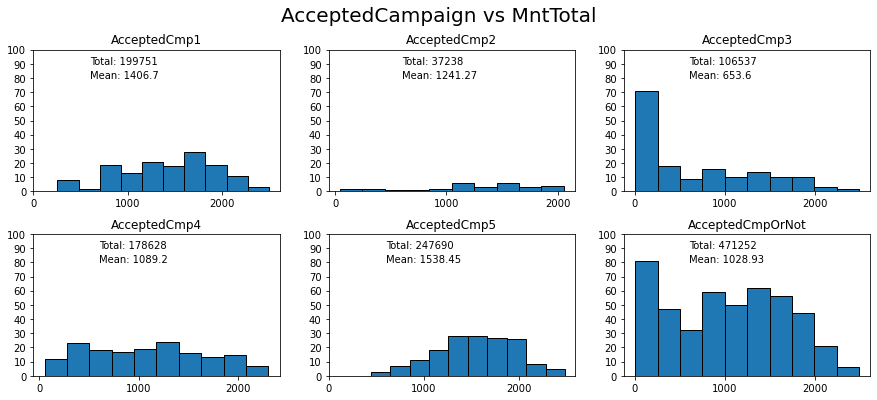

In [15]:
# 接收各活動的顧客消費總額分布

plt.figure(figsize=(15, 6))
for index, i in enumerate(df_camp.columns.sort_values()):
    df_temp = df[df[i]==1]
    plt.subplot(2, 3, index+1)
    plt.hist(df_temp['MntTotal'], edgecolor='black')
    plt.title(i)
    x_ticks = range(0, int(max(df['MntTotal'])) + 1, 1000)
    y_ticks = range(0, 110, 10)
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    plt.annotate(f"Mean: {round(df_temp['MntTotal'].mean(), 2)}", xy=(600, 80))
    plt.annotate(f"Total: {round(df_temp['MntTotal'].sum(), 2)}", xy=(600, 90))
plt.subplots_adjust(hspace=0.3)
plt.suptitle('AcceptedCampaign vs MntTotal', size=20)
plt.show()

年齡與消費總額的相關係數: 0.118


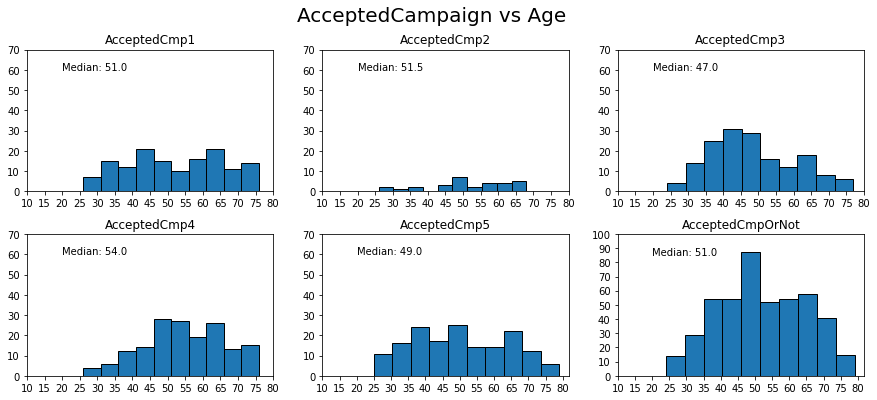

In [16]:
# 接受各活動的顧客年齡分布

print('年齡與消費總額的相關係數:', df['Age'].corr(df['MntTotal']).round(3))
plt.figure(figsize=(15, 6))
for index, i in enumerate(df_camp.columns.sort_values()):
    df_temp = df[df[i]==1]
    plt.subplot(2, 3, index+1)
    plt.hist(df_temp['Age'], edgecolor='black')
    plt.title(i)
    x_ticks = range(10, int(max(df['Age'])) + 1, 5)
    plt.xticks(x_ticks)
    if i != 'AcceptedCmpOrNot':
        y_ticks = range(0, 80, 10)
        plt.yticks(y_ticks)
        plt.annotate(f"Median: {round(df_temp['Age'].median(), 2)}", xy=(20, 60))
    else:
        y_ticks = range(0, 110, 10)
        plt.yticks(y_ticks)
        plt.annotate(f"Median: {round(df_temp['Age'].median(), 2)}", xy=(20, 85))
plt.subplots_adjust(hspace=0.3)
plt.suptitle('AcceptedCampaign vs Age', size=20)
plt.show()

,Campaign,Accepted (person),NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumTotalPurchases,NumAvgPurchases
0,AcceptedCmp1,142,817,870,1139,2826,19.901408
1,AcceptedCmp2,30,147,155,245,547,18.233333
2,AcceptedCmp3,163,734,612,816,2162,13.263804
3,AcceptedCmp4,164,929,676,1287,2892,17.634146
4,AcceptedCmp5,161,881,971,1335,3187,19.795031


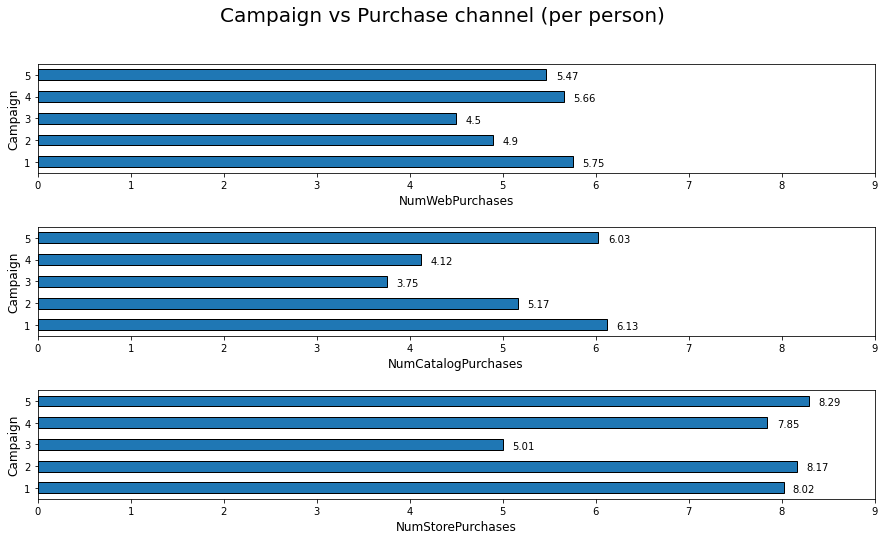

In [17]:
# 接受各活動的消費者購買通路選擇

Num = {}
for j in df_camp.columns:
    if j != 'AcceptedCmpOrNot':
        v_sum = []
        for index, i in enumerate(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']):
            temp_df = df[j]
            temp_df = pd.concat([temp_df, df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]], axis=1)
            temp_df = temp_df[temp_df[j]==1]
            v_sum.append(temp_df[i].sum())
        key = j
        Num[key] = v_sum
df_camp_channel = pd.DataFrame(Num).T.reset_index()
df_camp_channel.columns = ['Campaign', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df_camp_overview = df_cmp_accept.merge(df_camp_channel, on='Campaign', how='left')
df_camp_overview['NumTotalPurchases'] = df_camp_overview['NumWebPurchases'] + df_camp_overview['NumCatalogPurchases'] + df_camp_overview['NumStorePurchases']
df_camp_overview['NumAvgPurchases'] = df_camp_overview['NumTotalPurchases'] / df_camp_overview['Accepted (person)']
display(df_camp_overview)

fig, ax = plt.subplots(figsize=(15, 8))
for index, i in enumerate(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']):
    plt.subplot(3, 1, index+1)
    temp = df_camp_overview[['Campaign', 'Accepted (person)', i]]
    x = temp[i] / temp['Accepted (person)']
    x.index = range(1, 6)
    x.plot.barh(edgecolor='black')
    plt.ylabel('Campaign', size=12)
    plt.xlabel(i, size=12)
    plt.xticks(range(0, 10, 1))
    for i, value in enumerate(x):
        plt.text(value+0.1, i-0.2, str(round(value, 2)), color='black')
plt.suptitle('Campaign vs Purchase channel (per person)', size=20)
plt.subplots_adjust(hspace=0.5)
plt.show()

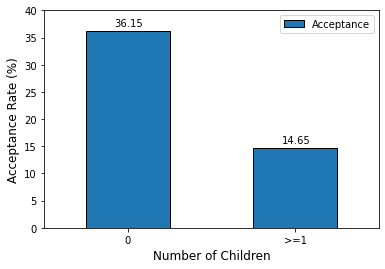

In [18]:
# 是否有小孩對Campaign對接受比例

df['Children'] = [1 if x != 0 else 0  for x in df['Totalhome']]
temp = round(df.groupby(['Children'])[['AcceptedCmpOrNot']].mean()*100, 2)
temp.index = ['0', '>=1']
temp.columns=['Acceptance']
temp.plot.bar(edgecolor='black')
plt.xticks(rotation=0)
plt.yticks(range(0, 45, 5))
plt.xlabel('Number of Children', size=12)
plt.ylabel('Acceptance Rate (%)', size=12)
for i, value in enumerate(temp['Acceptance']):
        plt.text(i-0.08, value+1, str(round(value, 2)), color='black')
df_cmp_chid = df.groupby(['Children', 'Marital'])[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean()*100
plt.show()
# display(df_cmp_chid.round(2))

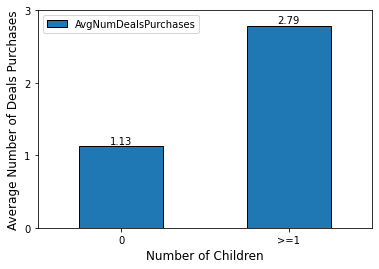

In [19]:
# 是否有小孩的平均使用折扣購買的次數

temp = round(df.groupby(['Children'])[['NumDealsPurchases']].mean(), 2)
temp.index = ['0', '>=1']
temp.columns=['AvgNumDealsPurchases']
temp.plot.bar(edgecolor='black')
plt.xticks(rotation=0)
plt.yticks(range(0, 4, 1))
plt.xlabel('Number of Children', size=12)
plt.ylabel('Average Number of Deals Purchases', size=12)
for i, value in enumerate(temp['AvgNumDealsPurchases']):
        plt.text(i-0.07, value+0.03, str(round(value, 2)), color='black')
plt.show()

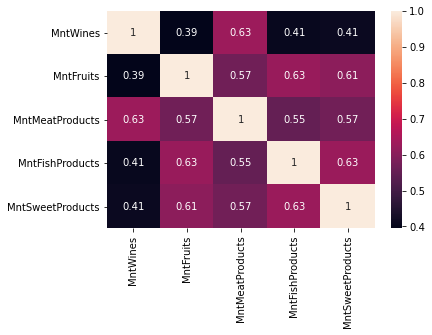

In [20]:
# 未接受過活動且家中有小孩的消費者，其各商品消費額的相關係數

temp = df[(df['AcceptedCmpOrNot']==0)&(df['Children']==1)&(df['NumDealsPurchases']!=0)][['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].corr()
sns.heatmap(temp, annot=True)
plt.show()